# Preamble

In [1]:
import demes
import demesdraw

# When plotting inside a notebook, its best to use the vector format SVG,
# instead of the ipython default (PNG, a raster format).
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("svg")

# Plot population size history

The `demesdraw.size_history()` function plots the population size as a function of time for each deme in the graph.

In [2]:
help(demesdraw.size_history)

Help on function size_history in module demesdraw.size_history:

size_history(graph: demes.demes.Graph, ax: matplotlib.axes._axes.Axes = None, inf_ratio: float = 0.1, inf_label: bool = False, invert_x: bool = False, num_exp_points: int = 100, annotate_epochs: bool = False, cmap: matplotlib.colors.Colormap = None, log_time: bool = False, log_size: bool = False, title: str = None)
    Plot population size as a function of time for each deme in the graph.
    
    :param demes.Graph graph: The demes graph to plot.
    :param matplotlib.axes.Axes ax: The matplotlib axes onto which the figure
        will be drawn. If None, an empty axes will be created for the figure.
    :param float inf_ratio: The proportion of the horizontal axis that will be
        used for the time interval which stretches towards infinity.
    :param bool inf_label: Write "inf" by the arrow that points towards infinity.
    :param bool invert_x: If true, the horizontal axis will have infinity
        on the left and

## One deme with constant size

With only one epoch, time stretches to infinity.

<AxesSubplot:xlabel='time ago (generations)', ylabel='deme\nsize'>

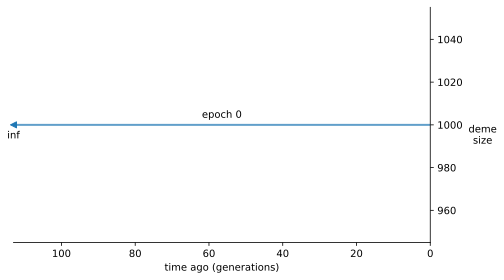

In [3]:
graph = demes.load("examples/one-deme-constant-N.yaml")
demesdraw.size_history(graph, invert_x=True, annotate_epochs=True, inf_label=True)

## One deme, two epochs

With more than one epoch, only part of the figure stretches to infinity. We specify how much space this part of the plot uses with the `inf_ratio` parameter.

<AxesSubplot:xlabel='time ago (generations)', ylabel='deme\nsize'>

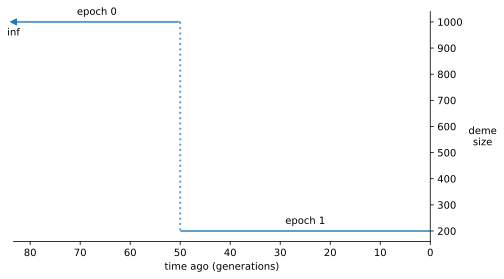

In [4]:
graph = demes.load("examples/one-deme-two-epoch.yaml")
demesdraw.size_history(graph, invert_x=True, annotate_epochs=True, inf_label=True, inf_ratio=0.4)

## One deme, three epochs, including an exponential decline

<AxesSubplot:xlabel='time ago (generations)', ylabel='deme\nsize'>

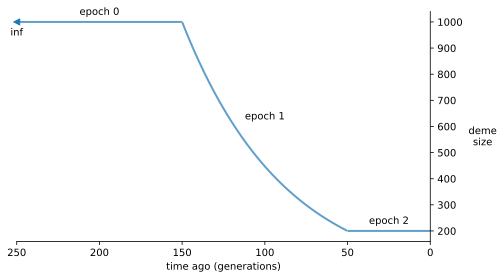

In [5]:
graph = demes.load("examples/one-deme-three-epoch-with-exp.yaml")
demesdraw.size_history(graph, invert_x=True, annotate_epochs=True, inf_label=True, inf_ratio=0.4)

## The ZigZag model from Schiffels & Durbin et al. (2014)

Here we use a log-10 scale for the horizontal axis.

<AxesSubplot:xlabel='time ago (generations)', ylabel='deme\nsize'>

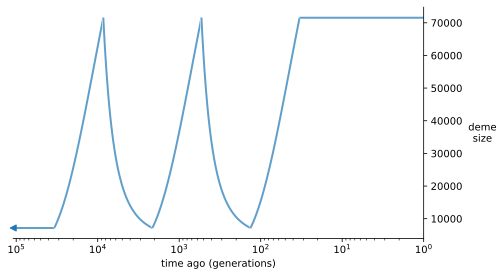

In [6]:
zigzag = demes.load("examples/zigzag.yaml")
demesdraw.size_history(zigzag, invert_x=True, log_time=True)

## Out-of-Africa model from Gutenkunst et al. (2009)

Multi-deme models can also be plotted with `demesdraw.size_history()`. Lines for distinct demes are given different colours and widths, with thinner lines drawn on top of thicker lines. Ancestor/descendant relationships are indicated as dotted lines.

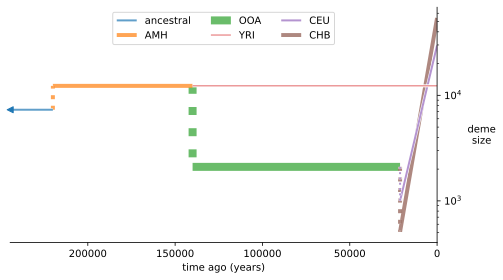

In [7]:
gutenkunst_ooa = demes.load("examples/gutenkunst_ooa.yaml")
ax = demesdraw.size_history(gutenkunst_ooa, invert_x=True, log_size=True)
ax.legend(handles=ax.legend_.get_lines(), ncol=3, loc="upper center")

# Schematic model overview

The `demesdraw.schematic()` function plots a "demes as tubes"-style schematic overview. Compared with the size-history figure above, this more fully captures the relationships between demes. Once again, ancestor/descendant relationships are indicated as dotted lines. In addition, continuous migrations and admixture pulses are also shown.

In [8]:
help(demesdraw.schematic)

Help on function schematic in module demesdraw.schematic:

schematic(graph: demes.demes.Graph, ax: matplotlib.axes._axes.Axes = None, cmap: matplotlib.colors.Colormap = None, log_time: bool = False, title: str = None, inf_ratio: float = 0.2, positions: Dict[str, float] = None, num_lines_per_migration: int = 10, seed: int = None, optimisation_rounds: int = None, labels: str = 'xticks-mid') -> matplotlib.axes._axes.Axes
    Plot a schematic of the demes in the graph and their relationships.
    
    The width of each deme is proportional to its size, and ancestor/descendant
    relationships are drawn as dotted lines.
    Pulses of admixture are drawn as dashed lines in the colour of the source
    deme, with an arrow pointing from the source to the destination.
    For each period of continuous migration, multiple thin lines are drawn in
    the colour of the source deme, with an arrow pointing from the source to
    the destination. The time of each migration line is drawn uniformly at

## Out-of-Africa model from Gutenkunst et al. (2009)

<AxesSubplot:ylabel='time ago (years)'>

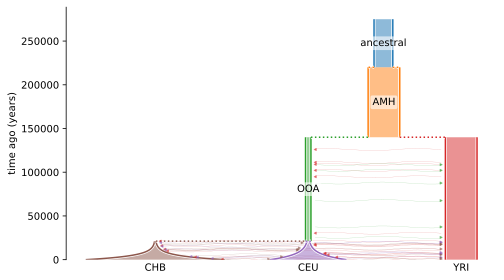

In [9]:
demesdraw.schematic(gutenkunst_ooa, num_lines_per_migration=6, seed=1234)

Migrations between the three extant demes are more clearly shown when the time axis uses a log scale.

<AxesSubplot:ylabel='time ago (years)'>

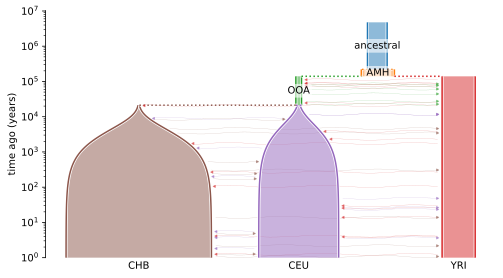

In [10]:
demesdraw.schematic(gutenkunst_ooa, num_lines_per_migration=6, log_time=True, seed=1234)

## Jacobs et al. (2019) model of achaic admixture in Melanesians

For more complex models, some customisation may be desired. Here is the default output for the Jacobs et al. (2019) model of archaic admixture in Melanesians.

<AxesSubplot:ylabel='time ago (generations)'>

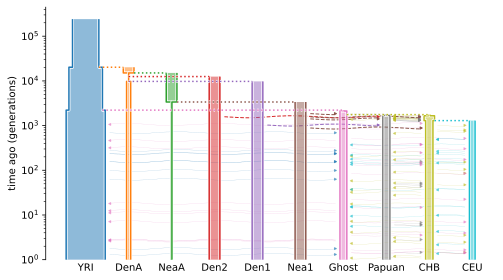

In [11]:
jacobs_papuans = demes.load("examples/jacobs_papuans.yaml")
demesdraw.schematic(jacobs_papuans, log_time=True, seed=1234)

### Improving the layout

The horizontal positions of the demes are determined using the `demesdraw.find_positions()` function. This uses an optimisation procedure that aims to place more closely related demes next to each other. However, the Jacobs et al. model has lots of demes, and the optimisation procedure has searched only a small part of the parameter space. Let's call `demesdraw.find_positions()` manually, and ask for it to more thoroughly search the parameter space.

In [12]:
help(demesdraw.find_positions)

Help on function find_positions in module demesdraw.schematic:

find_positions(graph: demes.demes.Graph, sep: float, rounds: int = None, seed: int = None) -> Dict[str, float]
    Find optimal positions for the demes along a single dimension by minimising:
    
      - the distance from each parent deme to the mean position of its children,
      - the distance between interacting demes (where interactions are either
        migrations or pulses),
      - the distance from zero.
    
    In addition, the solution is constrained so that contemporary demes
    have a minimum separation distance, ``sep``.
    
    :param demes.Graph graph: The graph for which positions should be obtained.
    :param float sep: The minimum separation distance between contemporary demes.
    :param int rounds: Number of rounds of optimisation to perform.
    :param int seed: Seed for the random number generator.
    
    :return: A dictionary mapping deme IDs to positions.
    :rtype: dict



<AxesSubplot:ylabel='time ago (generations)'>

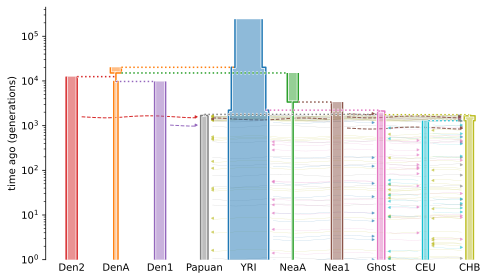

In [13]:
# Get the maximum deme size in the graph.
size_max = 0
for deme in jacobs_papuans.demes:
    for epoch in deme.epochs:
        size_max = max(size_max, epoch.start_size, epoch.end_size)

# Horizontal space given to each deme.
sep = 1.1 * size_max
# Search for "good" horizontal positions for the demes.
positions = demesdraw.find_positions(jacobs_papuans, sep, rounds=5000, seed=1234)
demesdraw.schematic(jacobs_papuans, log_time=True, positions=positions)

### Zooming in

The figure looks very busy around 1-2 thousand generations ago, and it's hard to see exactly what's going on. To zoom in on this region, set the axis limits for the vertical axis.

(800.0, 2000.0)

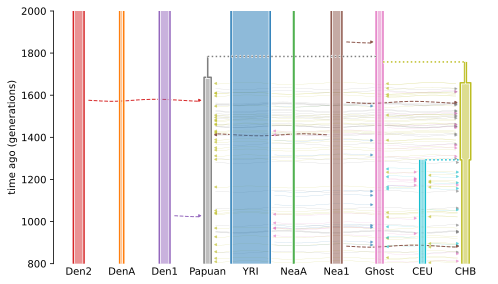

In [14]:
ax = demesdraw.schematic(jacobs_papuans, positions=positions, num_lines_per_migration=20)
ax.set_ylim(800, 2000)